In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import style
plt.style.use("bmh")

In [2]:
style.use('ggplot')

In [3]:
MF = pd.read_csv('M&MFIN.NS (1).csv',sep=',')
MF.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-03-17,45.000000,48.759998,41.029999,46.509998,40.984562,100305555.0
1,2006-03-20,46.950001,48.340000,46.000000,47.020000,41.433983,17253200.0
2,2006-03-21,47.150002,50.740002,47.099998,48.759998,42.967262,26048540.0
3,2006-03-22,48.740002,48.919998,45.619999,46.480000,40.958141,9556985.0
4,2006-03-23,46.779999,49.680000,46.779999,48.680000,42.896770,10851120.0
5,2006-03-24,49.740002,49.740002,48.070000,48.930000,43.117065,5462140.0
6,2006-03-27,49.000000,49.680000,48.419998,49.230000,43.381432,2789155.0
7,2006-03-28,49.599998,51.599998,48.700001,50.099998,44.148064,9506885.0
8,2006-03-29,50.400002,50.830002,49.000000,49.189999,43.346172,1674755.0
9,2006-03-30,49.799999,50.330002,48.340000,48.610001,42.835091,1291070.0


## EDA

In [4]:
MF.shape

(3849, 7)

In [5]:
MF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3849 non-null   object 
 1   Open       3835 non-null   float64
 2   High       3835 non-null   float64
 3   Low        3835 non-null   float64
 4   Close      3835 non-null   float64
 5   Adj Close  3835 non-null   float64
 6   Volume     3835 non-null   float64
dtypes: float64(6), object(1)
memory usage: 210.6+ KB


In [6]:
MF.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [7]:
MF.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3.835000e+03
mean,202.279884,206.213686,198.229599,202.051218,194.341156,2.393256e+06
std,131.984706,134.094221,129.613500,131.829035,129.834825,6.194752e+06
min,33.900002,36.000000,27.430000,34.009998,29.969580,0.000000e+00
25%,69.959999,70.860001,68.044998,69.424999,63.620535,1.928075e+05
50%,175.190002,178.350006,171.449997,175.250000,169.611038,9.224140e+05
75%,295.024994,301.449997,290.150009,295.274994,283.758866,2.008460e+06
max,532.500000,534.000000,516.650024,528.150024,514.796814,2.082185e+08


In [8]:
MF.isnull().sum()

Date          0
Open         14
High         14
Low          14
Close        14
Adj Close    14
Volume       14
dtype: int64

In [10]:
MF1 = MF.dropna()

In [11]:
MF1.shape

(3835, 7)

In [13]:
MF1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [24]:
X= MF1[['Open','High','Low','Volume']]
Y= MF1['Close']

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

In [37]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((2684, 4), (2684,), (1151, 4), (1151,))

In [38]:
X_train

,Open,High,Low,Volume
2228,265.899994,268.000000,261.000000,1458125.0
131,47.000000,48.400002,47.000000,73735.0
764,41.720001,41.880001,39.599998,40360.0
1472,146.610001,154.679993,146.520004,177540.0
275,47.000000,47.790001,46.020000,63495.0
...,...,...,...,...
2138,311.000000,342.000000,309.450012,4809799.0
169,47.000000,50.200001,47.000000,48570.0
2149,293.549988,303.500000,293.549988,973390.0
595,47.810001,49.599998,47.810001,30180.0


In [39]:
Y_train

2228    265.299988
131      47.000000
764      40.669998
1472    151.869995
275      46.990002
           ...    
2138    333.200012
169      49.939999
2149    302.450012
595      48.900002
862      44.570000
Name: Close, Length: 2684, dtype: float64

In [40]:
X_test

,Open,High,Low,Volume
1393,132.419998,135.979996,132.199997,611110.0
3782,160.000000,162.199997,159.000000,3816556.0
165,51.000000,51.380001,49.240002,36345.0
342,46.000000,48.759998,46.000000,42540.0
2466,229.000000,234.000000,226.800003,757248.0
...,...,...,...,...
2621,363.450012,372.000000,362.450012,3288765.0
2393,247.000000,247.000000,241.300003,875597.0
3790,155.100006,155.649994,154.000000,3197436.0
3533,126.207352,127.182869,123.799049,15571569.0


In [41]:
Y_test

1393    134.020004
3782    161.699997
165      49.560001
342      48.209999
2466    232.100006
           ...    
2621    364.950012
2393    243.050003
3790    154.399994
3533    124.378258
3687    218.600006
Name: Close, Length: 1151, dtype: float64

In [44]:
reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)

LinearRegression()

In [48]:
Y_pred = reg_model.predict(X_test)
result = pd.DataFrame({'Actual Price':Y_test,'Predicted Price':Y_pred})
result.head(50)

,Actual Price,Predicted Price
1393,134.020004,134.657735
3782,161.699997,160.697444
165,49.560001,49.809144
342,48.209999,47.817752
2466,232.100006,230.855174
3840,188.649994,188.964360
1078,113.040001,115.039665
201,53.599998,53.537999
895,50.209999,50.011309
3051,469.399994,469.886818


In [49]:
import math

In [50]:
reg_model.score(X_test,Y_test)

0.9996820399355668

In [52]:
print("Mean Absolute Error:",metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error: 1.5250553176225634


In [53]:
print("Mean Squared Error:",metrics.mean_squared_error(Y_test,Y_pred))

Mean Squared Error: 5.490339453643899


In [54]:
print("Root Mean Squared Error:",math.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Root Mean Squared Error: 2.343147339294714


<AxesSubplot:>

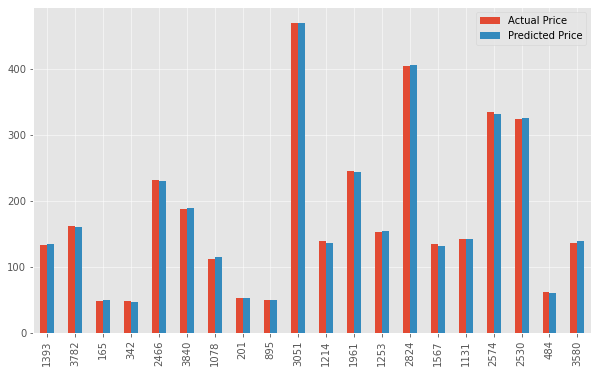

In [56]:
graph=result.head(20)
graph.plot(kind='bar',figsize=(10,6))

In [57]:
#Get the number of training days
MF1.shape

(3835, 7)

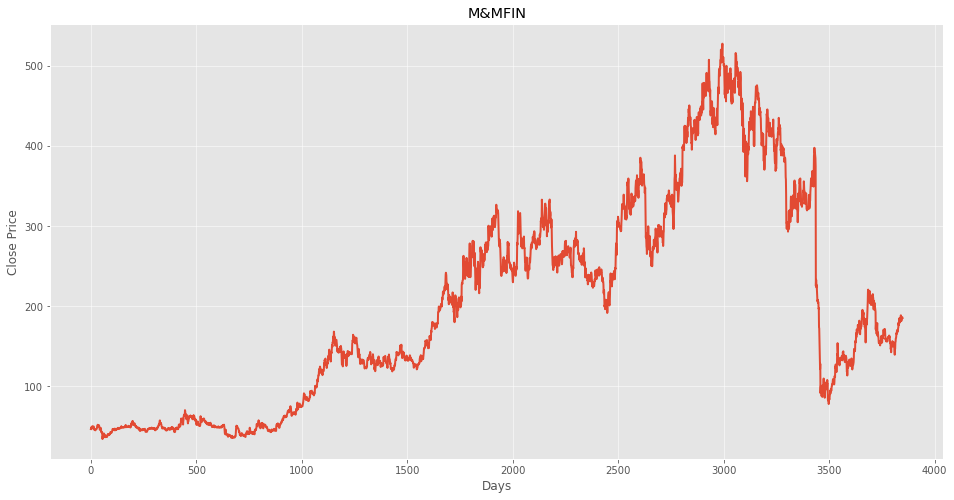

In [60]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('M&MFIN')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(MF1['Close'])
plt.show()

In [61]:
# Get the close price
MF1 = MF1[['Close']]
MF1.head(10)

,Close
0,46.509998
1,47.020000
2,48.759998
3,46.480000
4,48.680000
5,48.930000
6,49.230000
7,50.099998
8,49.189999
9,48.610001


In [82]:
# Create a variable to predict x days out into the future
future_days = 25
MF1['Prediction']=MF1[['Close']].shift(-future_days)
MF1.tail(5)

,Close,Prediction
3844,184.550003,NaN
3845,185.000000,NaN
3846,186.500000,NaN
3847,186.050003,NaN
3848,185.199997,NaN


In [83]:
# Create the feature  data set (X) and convert it into a numpy array and remove the 'x' rows/days
X =np.array(MF1.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 46.509998]
 [ 47.02    ]
 [ 48.759998]
 ...
 [168.25    ]
 [170.199997]
 [168.100006]]


In [84]:
# Create the target data set (Y) and convert to a numpy array and get all the target values except the last 'x'raws/days
Y= np.array(MF1['Prediction'])[:-future_days]
print(Y)            

[ 46.419998  46.560001  46.939999 ... 186.5      186.050003 185.199997]


In [85]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.30)

In [86]:
X_train.shape,Y_train.shape

((2667, 1), (2667,))

In [87]:
X_test.shape,Y_test.shape

((1143, 1), (1143,))

In [88]:
# Get the last 'x' rows of the future data set
x_future = MF1.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[154.350006],
       [156.350006],
       [155.699997],
       [153.649994],
       [152.899994],
       [154.      ],
       [155.25    ],
       [151.350006],
       [150.850006],
       [148.5     ],
       [148.050003],
       [142.949997],
       [139.399994],
       [146.300003],
       [146.899994],
       [155.100006],
       [155.550003],
       [159.699997],
       [160.149994],
       [162.050003],
       [166.350006],
       [165.149994],
       [168.25    ],
       [170.199997],
       [168.100006]])

In [89]:
# Create a model
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

In [90]:
# Show the model linear regression prediction
lr_prediction = lr_model.predict(x_future)
print(lr_prediction)

[157.00693287 158.95457251 158.32158086 156.32524731 155.59488245
 156.66609009 157.88336486 154.08547341 153.5985635  151.31008109
 150.87186509 145.90537817 142.44831489 149.16768041 149.75196353
 157.73729773 158.17551373 162.21686014 162.65507613 164.50534255
 168.6927707  167.52417523 170.54302251 172.44196824 170.39695538]


<ipython-input-91-1f89113da39a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


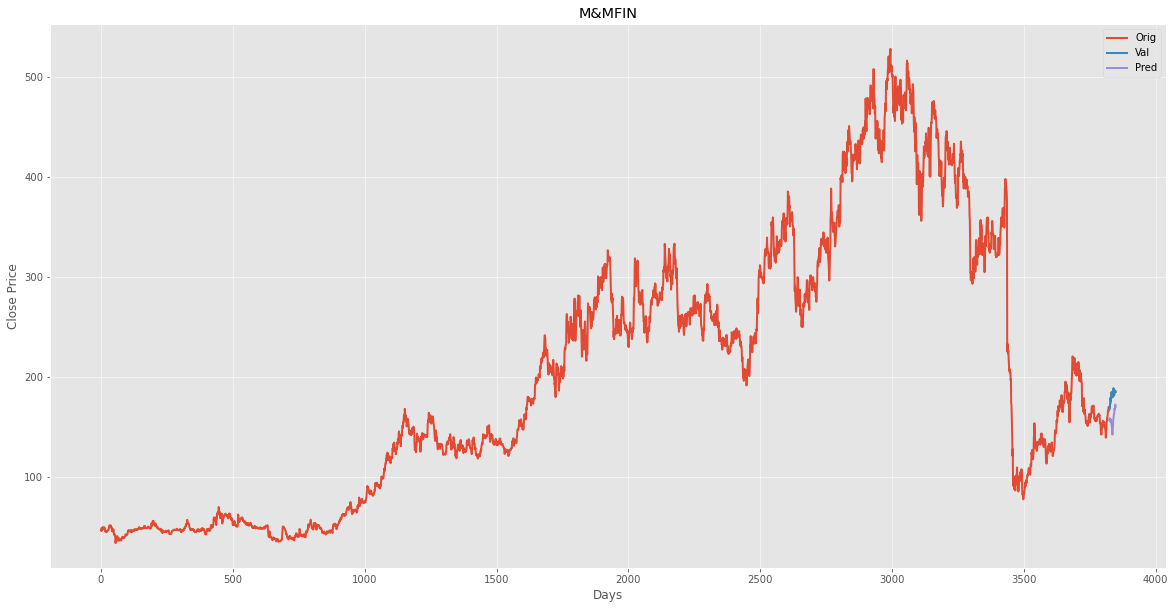

In [91]:
#Visualize the data
predictions = lr_prediction

valid = MF1[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(20,10))
plt.title('M&MFIN')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(MF1['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()